In [1]:
import pandas as pd
import numpy as np

red = pd.read_csv('winequality-red.csv', sep=";")
white = pd.read_csv('winequality-white.csv', sep=";")

red['color'] = 0
white['color'] = 1
df = pd.concat([red, white], ignore_index=True)

In [2]:
target = np.where(df['quality'] <= 5, 'low',
        np. where(df['quality'] <= 7, 'medium', 'hight'))
df.drop(labels='quality', inplace=True, axis=1)
pd.Series(target).value_counts(sort = True)

medium    3915
low       2384
hight      198
dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.3, random_state = 88)

In [4]:
pd.Series(y_test).value_counts(sort = True)

medium    1177
low        724
hight       49
dtype: int64

In [5]:
from sklearn.ensemble import RandomForestClassifier
las = RandomForestClassifier(n_estimators=100, max_depth = 3, max_features=5, random_state=88)
las.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=88, verbose=0, warm_start=False)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = las.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[  0   0  49]
 [  0 418 306]
 [  0 198 979]]
0.7164102564102565


In [7]:
pd.DataFrame({'cecha':X_train.columns, 'istotnosc':las.feature_importances_}).sort_values('istotnosc', ascending=False)

,cecha,istotnosc
10,alcohol,0.433421
1,volatile acidity,0.194081
7,density,0.151786
4,chlorides,0.058149
5,free sulfur dioxide,0.044960
9,sulphates,0.037160
2,citric acid,0.033328
6,total sulfur dioxide,0.021335
3,residual sugar,0.014316
0,fixed acidity,0.004730


In [8]:
las.estimators_[1]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=464623904, splitter='best')

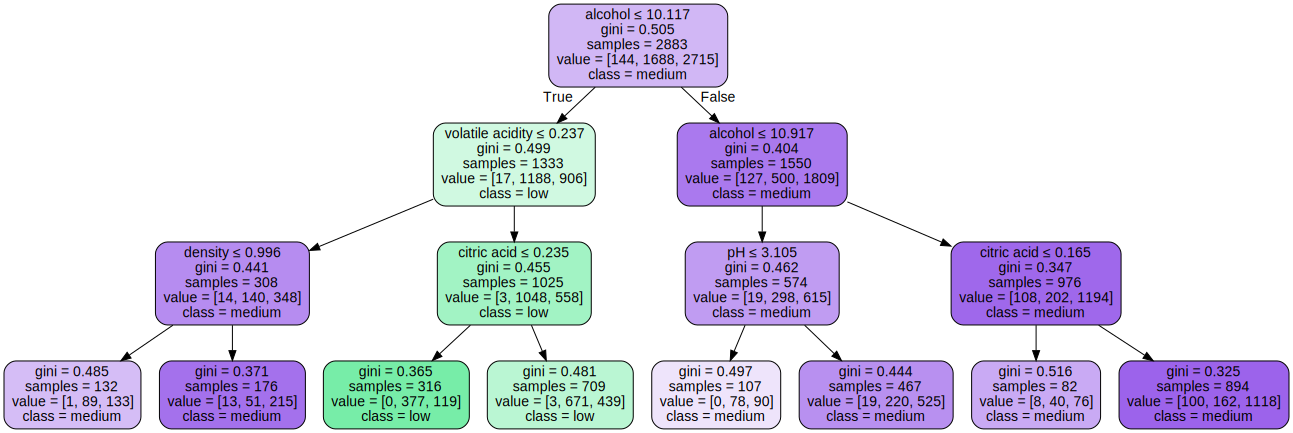

In [9]:
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from graphviz import Source

#drzewo = DecisionTreeClassifier(max_depth = 2)
#drzewo.fit(X_train, y_train)

graph = Source(
            export_graphviz(las.estimators_[1], out_file=None,
            filled=True, rounded=True,
            feature_names = X_train.columns,
            class_names = ['hight', 'low', 'medium'],
            special_characters=True)
            )
graph
#display(SVG(graph.pipe(format='svg')))